In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import os

/home/sakil/anaconda/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reading data
data = pd.read_csv('test_scores.csv')

In [4]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [62]:
df=data[['pretest']]
df.head()

,pretest
0,62.0
1,66.0
2,64.0
3,61.0
4,64.0


In [65]:
df1=data.copy()
df1=df1[['pretest']]
df1.head()

,pretest
0,62.0
1,66.0
2,64.0
3,61.0
4,64.0


In [60]:
df=data.iloc[9:,:-1]
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0
10,ANKYI,Urban,Non-public,6OL,Standard,20.0,DZMKU,Male,Does not qualify,61.0
11,ANKYI,Urban,Non-public,6OL,Standard,20.0,FH7B9,Male,Does not qualify,64.0
12,ANKYI,Urban,Non-public,6OL,Standard,20.0,JI9VG,Male,Does not qualify,66.0
13,ANKYI,Urban,Non-public,6OL,Standard,20.0,JQM2W,Female,Does not qualify,60.0


In [57]:
df=data.iloc[:,:-1]
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0


In [5]:
#Checking Null Values
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [6]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [7]:
filtered_data=pd.DataFrame(data,columns={"n_student","pretest"})

In [8]:
data.corr()

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


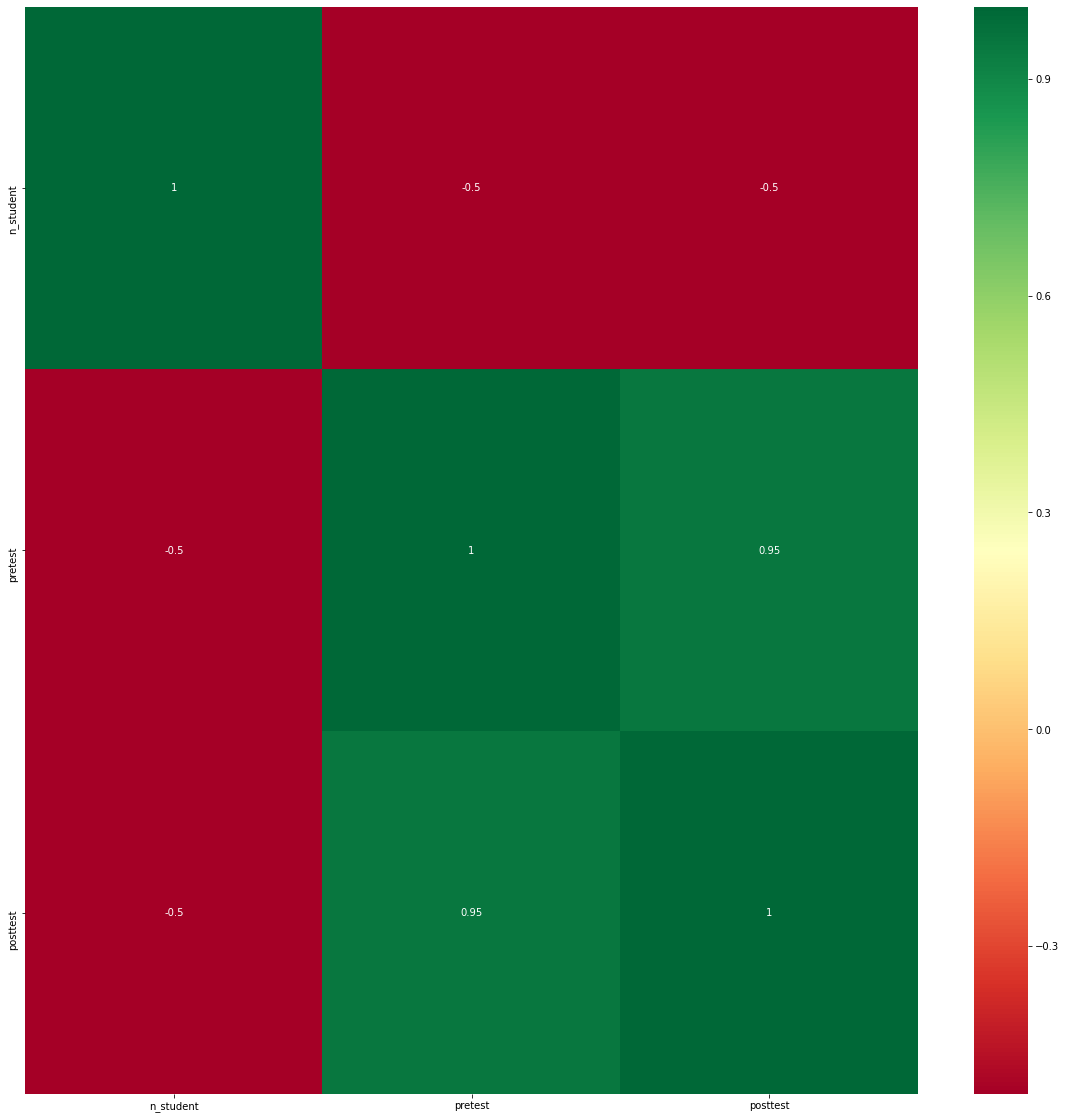

In [9]:
#get correlations of each features in dataset
corrmat = data.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


****Exploratory Data Analysis****

In [11]:
data.teaching_method.value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

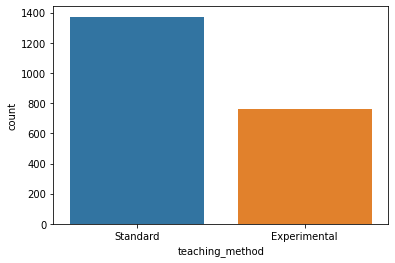

In [12]:
#checking for Semester
sns.countplot('teaching_method',data=data)

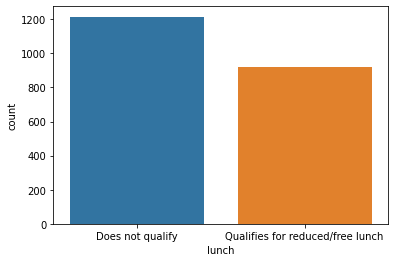

In [13]:
#checking for Semester
sns.countplot('lunch',data=data)

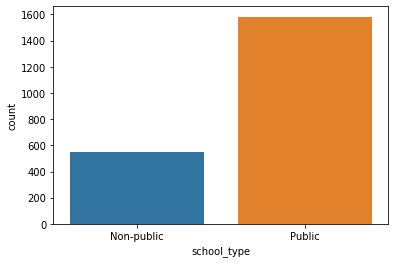

In [14]:
#checking for Semester
sns.countplot('school_type',data=data)

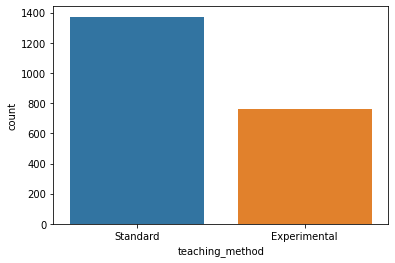

In [15]:
#checking for Semester
sns.countplot('teaching_method',data=data)

In [16]:
data.school.unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [17]:
data.school.value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [18]:
data.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest', 'posttest'],
      dtype='object')

In [19]:
data.classroom.value_counts()

18K    31
ZBH    30
Q0E    30
A93    30
QA2    30
       ..
KR1    15
SSP    15
IQN    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64

In [20]:
data.classroom.unique()

array(['6OL', 'ZNS', '2B1', 'EPS', 'IQN', 'PGK', 'UHU', 'UWK', 'A33',
       'EID', 'HUJ', 'PC6', '1Q1', 'BFY', 'OMI', 'X6Z', '2AP', 'PW5',
       'ROP', 'ST7', 'XXJ', '197', '5LQ', 'JGD', 'HCB', 'NOR', 'X78',
       'YUC', 'ZDT', 'ENO', 'TSA', 'VA6', '18K', 'CXC', 'HKF', 'PBA',
       'U6J', 'W8A', '05H', '98D', 'G2L', 'P2A', 'XZM', '1VD', '21Q',
       '2BR', '3D0', '5JK', 'O6A', 'QTU', 'AJ1', 'J8J', 'RA5', '5SZ',
       '6U9', 'FS3', 'XJ8', '0N7', '3XJ', 'RK7', 'SUR', 'X2O', 'XZ4',
       '1SZ', '62L', 'NWZ', 'S98', '08N', '9AW', 'IPU', 'KXB', 'PGH',
       'XXE', '6C1', 'AE1', 'H7S', 'P8I', 'SSP', 'CD8', 'J6X', 'KR1',
       '341', 'D33', 'DFQ', 'GYM', 'IEM', '7BL', 'A93', 'TB5', 'YTB',
       '1UU', '4NN', 'V77', 'CII', 'Q0E', 'QA2', 'ZBH'], dtype=object)

# Feature Engineering

In [21]:
Numerical_features=pd.DataFrame(data,columns={"n_student","pretest"})

**One-hot encoding**

In [22]:
#feature for one hot encoding
#school_setting,school_type,classroom,teaching_method,gender,lunch
one_hot_encoding_feature=pd.DataFrame(data,columns={"school_setting","school_type","teaching_method","gender","lunch"})
#performing one hot encoding on the feature Course
one_hot_encoding_feature_performing= pd.get_dummies(one_hot_encoding_feature,drop_first=True)
one_hot_encoding_feature_performing.head()

,school_setting_Suburban,school_setting_Urban,school_type_Public,gender_Male,teaching_method_Standard,lunch_Qualifies for reduced/free lunch
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,0,1,0,1,1,0
3,0,1,0,0,1,0
4,0,1,0,1,1,0


In [23]:
one_hot_encoding_feature_performing.shape

(2133, 6)

**Performed one-hot encoding on most 5 frequent categories and put 0 for remaining.**

In [24]:
one_hot_encoding_on_most_frequent_categories=data.copy()
one_hot_encoding_on_most_frequent_categories1=pd.DataFrame(one_hot_encoding_on_most_frequent_categories,columns={"school","classroom"})

In [25]:
#Checking the categories in the dataset
for i in one_hot_encoding_on_most_frequent_categories1.columns:
    print(i,":",len(one_hot_encoding_on_most_frequent_categories[i].unique()),"labels")

school : 23 labels
classroom : 97 labels


In [26]:
one_hot_encoding_on_most_frequent_categories1.school.value_counts().sort_values(ascending=False).head(10)

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
Name: school, dtype: int64

In [27]:
one_hot_encoding_on_most_frequent_categories1.classroom.value_counts().sort_values(ascending=False).head(10)

18K    31
ZBH    30
Q0E    30
A93    30
QA2    30
YTB    30
7BL    29
1Q1    28
SUR    28
ROP    28
Name: classroom, dtype: int64

In [28]:
#print top 10 features for CourseInstructor_10
school_10=one_hot_encoding_on_most_frequent_categories1.school.value_counts().sort_values(ascending=False).head(10).index
school_10=list(school_10)
school_10

['GOOBU',
 'QOQTS',
 'UKPGS',
 'DNQDD',
 'GJJHK',
 'ZOWMK',
 'VVTVA',
 'KZKKE',
 'CCAAW',
 'CUQAM']

In [29]:
#print top 10 features for CourseInstructor_10
classroom_10=one_hot_encoding_on_most_frequent_categories1.classroom.value_counts().sort_values(ascending=False).head(10).index
classroom_10=list(classroom_10)
classroom_10

['18K', 'ZBH', 'Q0E', 'A93', 'QA2', 'YTB', '7BL', '1Q1', 'SUR', 'ROP']

In [30]:
import numpy as np
for categories in school_10:
    one_hot_encoding_on_most_frequent_categories1[categories]=np.where(one_hot_encoding_on_most_frequent_categories1['school']==categories,1,0)

In [31]:
one_hot_encoding_on_most_frequent_categories1.head()

,school,classroom,GOOBU,QOQTS,UKPGS,DNQDD,GJJHK,ZOWMK,VVTVA,KZKKE,CCAAW,CUQAM
0,ANKYI,6OL,0,0,0,0,0,0,0,0,0,0
1,ANKYI,6OL,0,0,0,0,0,0,0,0,0,0
2,ANKYI,6OL,0,0,0,0,0,0,0,0,0,0
3,ANKYI,6OL,0,0,0,0,0,0,0,0,0,0
4,ANKYI,6OL,0,0,0,0,0,0,0,0,0,0


In [32]:
import numpy as np
for categories in classroom_10:
    one_hot_encoding_on_most_frequent_categories1[categories]=np.where(one_hot_encoding_on_most_frequent_categories1['classroom']==categories,1,0)

In [33]:
one_hot_encoding_on_most_frequent_categories1.head()

,school,classroom,GOOBU,QOQTS,UKPGS,DNQDD,GJJHK,ZOWMK,VVTVA,KZKKE,...,18K,ZBH,Q0E,A93,QA2,YTB,7BL,1Q1,SUR,ROP
0,ANKYI,6OL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ANKYI,6OL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ANKYI,6OL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ANKYI,6OL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ANKYI,6OL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#one_hot_encoding_on_most_frequent_categories1_filtered_features=pd.DataFrame(one_hot_encoding_on_most_frequent_categories1,columns={"GOOBU",})

In [34]:
one_hot_encoding_on_most_frequent_categories1_filtered_features=one_hot_encoding_on_most_frequent_categories1.iloc[:,2:22]
one_hot_encoding_on_most_frequent_categories1_filtered_features.head()

,GOOBU,QOQTS,UKPGS,DNQDD,GJJHK,ZOWMK,VVTVA,KZKKE,CCAAW,CUQAM,18K,ZBH,Q0E,A93,QA2,YTB,7BL,1Q1,SUR,ROP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
one_hot_encoding_on_most_frequent_categories1_filtered_features.shape

(2133, 20)

In [36]:
#combining the features
combined_features=pd.concat([one_hot_encoding_on_most_frequent_categories1_filtered_features, one_hot_encoding_feature_performing],axis=1)
combined_features.head()

,GOOBU,QOQTS,UKPGS,DNQDD,GJJHK,ZOWMK,VVTVA,KZKKE,CCAAW,CUQAM,...,7BL,1Q1,SUR,ROP,school_setting_Suburban,school_setting_Urban,school_type_Public,gender_Male,teaching_method_Standard,lunch_Qualifies for reduced/free lunch
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [37]:
combined_features.shape

(2133, 26)

In [38]:
training_features=pd.concat([Numerical_features,combined_features],axis=1)
training_features.head()

,pretest,n_student,GOOBU,QOQTS,UKPGS,DNQDD,GJJHK,ZOWMK,VVTVA,KZKKE,...,7BL,1Q1,SUR,ROP,school_setting_Suburban,school_setting_Urban,school_type_Public,gender_Male,teaching_method_Standard,lunch_Qualifies for reduced/free lunch
0,62.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,66.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,64.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,61.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,64.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [39]:
target_feature=pd.DataFrame(data,columns={"posttest"})

In [40]:
X =training_features.copy()
y = target_feature.copy()

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 42)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1706, 28), (427, 28), (1706, 1), (427, 1))

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [46]:
predictions = tree.predict(X_test)

**Features**

****Process data****

****Train, Test****

# Modeling: Decision Tree

# Evaluating model: using MAE, MSE, RMSE and r2

In [47]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))

Mean Absolute Error (MAE): 3.2476971116315383
Mean Squared Error (MSE): 17.630801457194902
Root Mean Squared Error (RMSE): 4.198904792585193
R^2: 0.9123466144093391


# Feature importance

# result

In [48]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))

Mean Absolute Error (MAE): 3.2476971116315383
Mean Squared Error (MSE): 17.630801457194902
Root Mean Squared Error (RMSE): 4.198904792585193
R^2: 0.9123466144093391


In [49]:
# my_submission = pd.DataFrame(predictions)
# my_submission.to_csv('submission.csv', index=False)

In [50]:
# my_submission.head()

# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train)

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [51]:
randomforest_prediction=randomforest.predict(X_test)

In [52]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, randomforest_prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, randomforest_prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, randomforest_prediction)))
print('R^2:', metrics.r2_score(y_test, randomforest_prediction))

Mean Absolute Error (MAE): 2.6566580826797455
Mean Squared Error (MSE): 11.554552401050755
Root Mean Squared Error (RMSE): 3.399198788104449
R^2: 0.9425553262909957


In [53]:
import pickle

In [54]:
filename = 'model.pkl'
pickle.dump(randomforest, open(filename, 'wb'))

# KNN

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
regressor=KNeighborsRegressor(n_neighbors=8)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [101]:
knn_prediction=regressor.predict(X_test)

In [102]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, knn_prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, knn_prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, knn_prediction)))
print('R^2:', metrics.r2_score(y_test, knn_prediction))

Mean Absolute Error (MAE): 2.822014051522248
Mean Squared Error (MSE): 13.039300351288055
Root Mean Squared Error (RMSE): 3.6109971408584713
R^2: 0.9351737455441951


# HyperParameter

In [103]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10,1500)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [104]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.5min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [105]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230}

In [106]:
rf_randomcv

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [107]:
best_random_grid=rf_randomcv.best_estimator_

In [108]:
optimized_pred=best_random_grid.predict(X_test)

In [109]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, optimized_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, optimized_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, optimized_pred)))
print('R^2:', metrics.r2_score(y_test, optimized_pred))

Mean Absolute Error (MAE): 2.3938485813870076
Mean Squared Error (MSE): 9.676325345862063
Root Mean Squared Error (RMSE): 3.1106792418798284
R^2: 0.9518931298329941


In [114]:
my_submission_final = pd.DataFrame(optimized_pred)
my_submission_final.to_csv('submission.csv', index=False)

In [110]:
import lightgbm as lgbm

In [111]:
model = lgbm.LGBMRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model.fit(X_train, y_train)
    

LGBMRegressor()

In [112]:
expected_y  = y_test
predicted_y = model.predict(X_test)


In [113]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predicted_y))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))
print('R^2:', metrics.r2_score(y_test, predicted_y))

Mean Absolute Error (MAE): 2.4907686176923156
Mean Squared Error (MSE): 10.136177594112663
Root Mean Squared Error (RMSE): 3.183736420326385
R^2: 0.9496069259682122
